In [2]:
# Click into this cell and press shift-enter before using this notebook.
# This line loads the ability to use %%ai in your file
%load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

# Lecture 8, CMPSC 5A, F25

10/21/2025, Tuesday of Week 4

# Notes to self 
* Check font size
* Check that you are sharing the screen on the zoom session
* Ask staff to help monitor the zoom chat
* Remind students to run the top cell

## Where are we in the reading?

You should have already read:
* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 (Causality and Experiments)](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5 (Sequences)](https://inferentialthinking.com/chapters/05/Sequences.html)
  

### For Today of week 4 (next week):

**Updated Reading Assignment**

Sorry to pile on the reading, but we need this for the upcoming lab.  Fortunately, we've gone over most of what you need in lecture, but it's important to reinforce that with the textbook reading:

* [Chapter 6 (Tables)](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7 (Visualizations)](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)


## Upcoming Quiz, Midterm

As a reminder, here are the dates for the next quiz and the next midterm:

| Item | % of grade | Dates | Week(s) |
|-|-|-|-|
|Quiz2 | approx 2.5% | Friday Oct 24, and Monday Oct 27 | Week 4/5|
|Exam1 (midterm) | 15% |Friday Oct 31, and Monday Nov 3 | Week 5/6|
|Exam2 (final*) | 15% | Mon Dec 8, Tue Dec 9, Wed Dec 10 | Finals Week|

\*Also, during the official final exam slot, Tue Dec 9, 4-7pm, times tbd

## Register now:

* Go to <https://us.prarietest.com>
* Find `CMPSC 5A`
* Find `Exams available for reservation`
* Quiz1 and Exam1 are available for making reservations *now*.
* Please make your reservations early.

**Please watch your email over the next few days** for information about practice quizzes.


## Today's in-class assignment: ic10

For today's in-class assignment, we'll just "try" [PracticeQuiz02](https://us.prairielearn.com/pl/course_instance/194488/assessment/2603849) on PrairieLearn

[5 minute timer](https://timer.live/5-minute-timer)


* For today, the "score" doesn't count; just that you attempted the problems.
  * Because it's practice, you get two chances at each problem.
  * And, you can try the problem as many times as you want (or at least that's the *intent*; if it isn't working that way, please let me know.  We are pioneers at UCSB in using this system, so we are still figuring out all of it's quirks.)
  * It's set up right now for 2 attempts per variant so that after two attemps you can see the correct answer.  My hope is that you can still take it a second (or third, or fourth, or twentieth) time if you get questions wrong on the first attempt.
  * If it's not working as intended, *please* let me know.
* Tomorrow, for ic11 in your discussion section, the *score* will count.
  * And you'll only get one attempt per problem.
  * So, please practice between today and tomorrow so that you can get a good score in section.
  * In section, you can ask for help, check your answers on JupyterHub etc.
  * Each ic is worth about 1% of your final course grade
* Then, Friday Oct 24/Monday Oct 27, Quiz 2 will be structured the same
  * Just one attempt per problem.
  * So make them count!
  * Quiz 2 will count the same as a lab; about 2.5% of your course grade.
* Then, Friday Oct 31/Monday Nov 3, Exam 1 (Midterm) will include all of these questions, plus more
  * There will be a second practice quiz next week for the additional question types for the Midterm
  * The midterm will have at least 10 question types (including the five from Quiz2), but no more than 20.
  * The midterm is 15% of your course grade.

So: practice, practice, practice!

## Review of lecture07

* We reviewed how to handle ties when sorting
* We talked about the min, and max functions for numpy.ndarrays
* We talked about using `where` with the `where` predicates
  * (e.g. `table.where("Column Name", are.equal_to(value))`
* We talked about how to randomly sample a dataset:
  * Generate an array of indexes with:
    ```
    allRowIndexes = np.arange(table.num_rows)
    randomIndexes = np.random.choice(allRowIndexes, 10, replace=False)
    ```
  * Use `table.take(randomIndexes)`
* We showed how to write a function that will randomly sample a table, as a demonstration of *writing our own functions* (we'll review that briefly below)
* We then showed how we can add columns to a table that are a *function of another column*.  For example:
  * The courses table has a field that combines three things into one string: subject area (dept), course number, and section suffix.
  * We wrote three functions that take in a course number, and return one of these three things.
  * We then used the `apply` method to create three new columns with this information.
  * We'll review this briefly also.
* We saw `for` loops
* We saw Python formatted strings (e.g. `print(f"x={x} y={y}")`)

In [4]:
uc_csv_data = """
Campus,Location,Undergrad Enrollment,Grad Enrollment,Total Enrollment,Year Founded,Latitude,Longitude
UCLA,Los Angeles,31600,13100,44700,1919,34.0689,-118.4439
UC Berkeley,Berkeley,30800,11700,42500,1868,37.8719,-122.2585
UC San Diego,San Diego,30200,9700,39900,1960,32.8801,-117.2340
UC Davis,Davis,30300,7500,37800,1905,38.5382,-121.7617
UC Santa Barbara,Santa Barbara,22000,3600,25600,1944,34.4133,-119.8489
UC Irvine,Irvine,29600,5800,35400,1965,33.6405,-117.8443
UC Santa Cruz,Santa Cruz,17300,1800,19100,1965,36.9914,-122.0588
UC Riverside,Riverside,23900,5400,29300,1954,33.9737,-117.3281
UC Merced,Merced,7700,1100,8800,2005,37.3646,-120.4244
"""

from io import StringIO
ucTable = Table.read_table(StringIO(uc_csv_data))
ucYears = ucTable.select("Campus","Year Founded") \
  .relabel("Year Founded","year") \
  .relabel("Campus","name")
ucAges = ucYears.with_column("age", 2025 - ucYears.column("year"))
ucAges

name,year,age
UCLA,1919,106
UC Berkeley,1868,157
UC San Diego,1960,65
UC Davis,1905,120
UC Santa Barbara,1944,81
UC Irvine,1965,60
UC Santa Cruz,1965,60
UC Riverside,1954,71
UC Merced,2005,20


In [5]:
ucAgesDesc = ucAges.sort("age",descending=True)
ageOf7thOldestUC = ucAgesDesc.column("age").item(6)
sevenOldestUCs = ucAgesDesc.\
     where("age",are.above_or_equal_to(ageOf7thOldestUC))
sevenOldestUCs = sevenOldestUCs.sort("age", descending="True")
sevenOldestUCs

name,year,age
UC Berkeley,1868,157
UC Davis,1905,120
UCLA,1919,106
UC Santa Barbara,1944,81
UC Riverside,1954,71
UC San Diego,1960,65
UC Irvine,1965,60
UC Santa Cruz,1965,60


Note that we get eight UCs instead of seven because there was a tie (UC Irvine and UC Santa Cruz are both 60 years old in 2025).

## Review: the `randomSample` function

Last time, we defined our own `randomSample` function that takes in two 
parameters:
* `myTable` is any `Table` object
* `size` is how many rows we want to sample

In [3]:
def randomSample(myTable, size):
    n = myTable.num_rows 
    allRowIndexes = np.arange(n) 
    randomIndexes = \
      np.random.choice(
        allRowIndexes, size, replace=False
      )
    randomRows = myTable.take(randomIndexes)
    return randomRows

Once the function is defined, we can call this function on any table we like.  Here's another table that's in our data directory:

In [4]:
courseTable = Table.read_table("data/ucsb-s25-courses.csv")
movies = Table.read_table("data/movies_by_year_with_ticket_price.csv")

In [9]:
randomSample(movies,2)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
1998,4.69,6575.8,336,Saving Private Ryan
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi


In [8]:
randomSample(courseTable,3)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS
AS AM 8 -1,25,"ETH (CRST), D (ENGR), D (L&S), ETH (L&S), ETH (ENGR)",SHAH N,24,20252,105,nan
PHIL 166B -1,34,nan,ELIZONDO E S,35,20252,100,nan
PSY 199 -4,2,nan,SCUDDER S L,1,20252,400,nan


In [10]:
randomSample(courseTable,5)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS
CHEM 6BL-12,17,nan,"GAINER M J, LIU H",18,20252,1200,nan
COMM 194 -2,0,nan,HOUSTON R,15,20252,200,nan
CNCSP 99RA-1,0,nan,nan,10,20252,100,nan
EEMB 280 -1,0,nan,nan,2,20252,101,nan
LING 12 -1,17,SUB (UCSB),BAKER A D,18,20252,100,nan


A key concept with functions is that we define what parameters we are expecting (in this case, a table, and a number of rows), and then we can use the function to get the result we want for *any* table, and *any* number of rows.

## Review of the `COURSEID` field again

Pulling out a random sample of the `COURSEID` field, we see that it combines three things into one field:


In [12]:
randomCourses = randomSample(courseTable,5)
courseIds = randomCourses.column("COURSEID")
for courseId in courseIds:
    print(courseId)

HIST      2C -1
PHIL      3  -1
MATRL   598  -18
EARTH    10  -1
GEOG    599  -8


Using the `.replace` method for Python Strings, and putting some numbers above to help us count, we can see that:
* `[0:8]` is for the subject area
* `[8:13]` is for course number with two letter suffix
* `[14:]` is the section suffix

In [13]:
    
print("          11111111112")
print("012345678901234567890")
for courseId in courseIds:
    print(courseId.replace(" ","@"))

          11111111112
012345678901234567890
HIST@@@@@@2C@-1
PHIL@@@@@@3@@-1
MATRL@@@598@@-18
EARTH@@@@10@@-1
GEOG@@@@599@@-8


With that, we can write some functions that will turn a COURSEID into its three parts.  We add `.strip` which gets rid of spaces at the beginning and end:

In [16]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

We can test these with a for loop and a format string:

To review:
* We put the letter `f` before the opening `"` in the string
* Then we can put variables names in `{}` and they will be substituted in
* Also notice that we can put multiple lines of code inside a for loop; it is run once for each value in the array `courseIds`

In [25]:
courseIds = randomSample(courseTable,5).column("COURSEID")

for courseId in courseIds:
   dept = courseIdToDept(courseId)
   courseNum = courseIdToCourseNum(courseId)
   suffix = courseIdToSuffix(courseId)
   print(f"courseId={courseId:15} dept={dept:9} courseNum={courseNum:6} suffix={suffix:3}")


courseId=GER     199  -1 dept=GER       courseNum=199    suffix=1  
courseId=CH ST   501  -3 dept=CH ST     courseNum=501    suffix=3  
courseId=ECON      5  -2 dept=ECON      courseNum=5      suffix=2  
courseId=ART     100  -1 dept=ART       courseNum=100    suffix=1  
courseId=POL S     6  -1 dept=POL S     courseNum=6      suffix=1  


## Review: Using functions to make a new table: `apply`

Note: material in this section of the lecture comes from

* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)


Now that we know how to use functions to transform data, 
we can use this to:
* make new arrays using the `apply` method.
* add those to a table as columns

Here's what that looks like:

We start with our courseTable:

In [27]:
courseTable

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed


Remember the three functions from before for converting `COURSEID` values:

In [28]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

We can make three new arrays by applying these functions to column 0 of our `courseTable`.  Each result we get back is an array.  The `0` indicates we are applying our functions to column 0.

In [29]:
departments = courseTable.apply(courseIdToDept, 0)
departments

array(['CMPSC', 'CMPSC', 'CMPSC', ..., 'GLOBL', 'FAMST', 'BIOE'],
      dtype='<U8')

In [30]:
courseNums = courseTable.apply(courseIdToCourseNum, 0)
courseNums

array(['5A', '5A', '5A', ..., '596B', '599', '596'],
      dtype='<U5')

In [31]:
suffixes = courseTable.apply(courseIdToSuffix, 0)
suffixes

array(['1', '1', '1', ..., '7', '11', '9'],
      dtype='<U2')

Now, we can create a new table by adding these columns to our existing table.  We'll call this `courses`, because this is the basic table that represents all UCSB course data for S25.

Now, we can create a new table by adding these columns to our existing table:

In [55]:
courses = courseTable.with_columns("dept",departments,"courseNum",courseNums,"suffix",suffixes)

In [56]:
courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1


And with this new tables, we can use the `where` clause to focus our attention on particular departments:

In [57]:
csCourses = courses.where("dept",are.equal_to("CMPSC"))
pstatCourses = courses.where("dept",are.equal_to("PSTAT"))
artHistory = courses.where("dept",are.equal_to("ARTHI"))

In [58]:
csCourses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1


In [59]:
pstatCourses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
PSTAT 5A -1,190,"QNT (L&S), C (L&S)",DUAN J,250,20252,100,nan,PSTAT,5A,1
PSTAT 5A -1,13,"QNT (L&S), C (L&S)",MOHANRAJ D,25,20252,101,nan,PSTAT,5A,1
PSTAT 5A -1,11,"QNT (L&S), C (L&S)",MOHANRAJ D,25,20252,102,nan,PSTAT,5A,1
PSTAT 5A -1,25,"QNT (L&S), C (L&S)",GIBBENS-MATSU,25,20252,103,nan,PSTAT,5A,1
PSTAT 5A -1,22,"QNT (L&S), C (L&S)",YANG JEFFREY,25,20252,104,nan,PSTAT,5A,1
PSTAT 5A -1,16,"QNT (L&S), C (L&S)",ABDUL-KADER A,25,20252,105,nan,PSTAT,5A,1
PSTAT 5A -1,24,"QNT (L&S), C (L&S)",ABDUL-KADER A,25,20252,106,nan,PSTAT,5A,1
PSTAT 5A -1,19,"QNT (L&S), C (L&S)",WANG YIXIN,25,20252,107,nan,PSTAT,5A,1
PSTAT 5A -1,21,"QNT (L&S), C (L&S)",YANG JEFFREY,25,20252,108,nan,PSTAT,5A,1
PSTAT 5A -1,23,"QNT (L&S), C (L&S)",KHAN E B,25,20252,109,nan,PSTAT,5A,1


In [60]:
artHistory

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
ARTHI 5A -1,338,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",CHATTOPADHYAY,350,20252,100,nan,ARTHI,5A,1
ARTHI 5A -1,22,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",VAN DOORNE T,25,20252,101,nan,ARTHI,5A,1
ARTHI 5A -1,25,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",VAN DOORNE T,25,20252,102,nan,ARTHI,5A,1
ARTHI 5A -1,23,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",CHEN JIAQI,25,20252,103,nan,ARTHI,5A,1
ARTHI 5A -1,25,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",CHEN JIAQI,25,20252,104,nan,ARTHI,5A,1
ARTHI 5A -1,22,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",CLARK R,25,20252,105,nan,ARTHI,5A,1
ARTHI 5A -1,25,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",LUCKMANN A,25,20252,106,nan,ARTHI,5A,1
ARTHI 5A -1,24,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",LUCKMANN A,25,20252,107,nan,ARTHI,5A,1
ARTHI 5A -1,24,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",CLARK R,25,20252,108,nan,ARTHI,5A,1
ARTHI 5A -1,25,"F (L&S), WRT (L&S), F (ENGR), WRT (ENGR)",SHEARD M,25,20252,109,nan,ARTHI,5A,1


## Review: Bar Graphs

Let's now return to some material from:

* [Chapter 7 (Visualization)](https://inferentialthinking.com/chapters/07/Visualization.html)

Let's see if we can make a bar graph of the data from `courseTable`.

But let's work with the `newTable` that has `dept`, `courseNum`, `suffix`.  And let's cut the data down to just three departments: `CMPSC`, `MATH`, `PSTAT`, just to make it a bit easier to work with.

It will be really handy to refer to this documentation:
* <https://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates>

In this context, a `predicate` is something that's true or false about rows of our data.  The one we will use here is `are.contained_in` which works with an array.

In [61]:
desired_departments = make_array("CMPSC", "PSTAT", "MATH")

In [62]:
coursesSubset = newTable.where("dept", are.contained_in(desired_departments))

In [63]:
coursesSubset.num_rows

736

Still pretty big, but a lot smaller than what we had before.

The first step is to group our data.

## Review: Grouping Data

In [64]:
allCoursesGroupedByDepartment = newTable.group("dept")
selectedCoursesGroupedByDepartment = coursesSubset.group("dept")

In [65]:
selectedCoursesGroupedByDepartment

dept,count
CMPSC,217
MATH,231
PSTAT,288


In [66]:
allCoursesGroupedByDepartment

dept,count
ANTH,126
ART,50
ART CS,17
ARTHI,82
AS AM,34
ASTRO,11
BIOE,26
BIOL CS,13
BL ST,39
C LIT,72


What we get back is a new table that shows the count of how many rows were in the original data set with each of the distinct values in the original.

# Simple Bar Graphs

Let's look again at what happens when we group the courses from three departments by subject area:

In [194]:
desired_departments = make_array("CMPSC", "PSTAT", "MATH")
coursesSubset = newTable.where("dept", are.contained_in(desired_departments))
coursesSubset.group("dept")

dept,count
CMPSC,217
MATH,231
PSTAT,288


When we have a nice clean table like this with just two columns:
* A label
* A number

We can get a bar chart very easily with this:

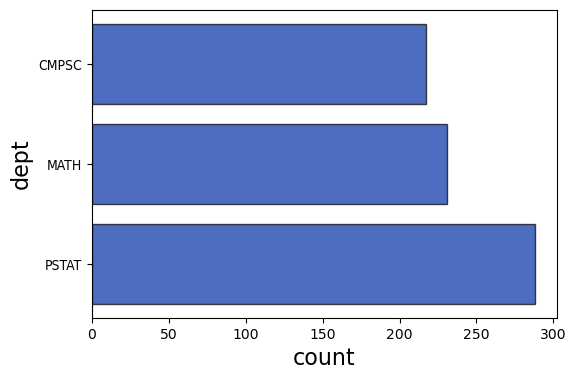

In [199]:
coursesSubset.group("dept").barh("dept","count")

But, as we'll see, this table comparing the count of courses between PSTAT, MATH and CMPSC for S25 is not entirely accurate. 

For one thing, the data has multiple rows for each course: one for the lecture, and another for the section.

So, while this is an interesting graph, we need to do some more work before we can rely on this for decision making.

## Data Cleaning: A first look

Data Cleaning typically involves removing data that:
* Contains errors
* Is inconsistent
* Accurately reflects the question we are asking.

As an example, suppose we want to know which departments (or more precisely, which subject areas) offer the most undergraduate courses at UCSB? 

Here's a quick and dirty analysis: we can group the courses table by department, and then sort, descending by the count:


In [68]:
courses.group("dept").sort("count",descending=True).show(5)

dept,count
CHEM,307
PSTAT,288
PSY,269
PHYS,257
MCDB,251


By this count, the top five departments are CHEM, PSTAT, PSY, PHYS and MCDB.

But, is this count accurate?

As we'll see if we look into the data in more detail, there are a few things throwing this off.

1. We haven't distinguished between grad and undergrad courses yet.
2. We are counting both lectures and sections.
3. Some departments offer a large number of "independent study" and "research seminar" courses with low enrollments that, while they are an important part of the UCSB experience, are in a different category, and may distort the numbers.  Those should perhaps be counted separately.


Let's look at each of these problems separately.  First, how can we check whether this table contains both grad and undergrad courses?

One way is to exploit the fact that the COURSEID field has particular digits in specific columns of the string.   We know that COURSEID has the format:
```
SSSSSSSSNNNXX-AA
```
For example, here's the course number for this course, CMPSC 5A, in this format, 
along with column numbers starting from 0 and going up to 15

```
          111111
0123456789012345
SSSSSSSSNNNXX-AA
CMPSC     5A -1
```

where:
* `SSSSSSSS` is the subject area
* `NNN` is the course number
* `XX` is the course number suffix
* `AA` is the number of the lecture section

Note that:
* If a course is a lower division undergrad course, `COURSEID[8]` will be blank (i.e. a space character in Python ` `).
* If a course is an upper division undergrad course, `COURSEID[8]` will be the `1` character.
* Anything else (e.g. `2`, `5`, etc.) is a graduate course.

Suppose we write a function that takes a courseid as a parameter, and then checks whether the character in position `[8]` is a `' '` (space) or a `'1'`:


In [76]:
def is_undergrad(courseid):
    """ returns true if course is undergrad, otherwise returns false """
    return courseid[8]==' ' or courseid[8]=='1'

Once we have this method, we can use it like this:

In [77]:
courses.where("COURSEID", is_undergrad)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1


But why does that work?  
* Short version: because `is_undergrad` is a special type of function called a *predicate*
* To understand more, let's look at this `.where()` method more closely.

## Short digression: the `table.where(...)` method

We've seen the `table.where(...)` method before.  It's one of the two ways we can slice a table horizontally:
* `table.take(...)` is used when we want to specify table rows by their *index*, i.e. the row number (starting with `0`).  
* `table.where(...)` is used when we want to specify table rows by *criteria*, i.e. something that is true about those rows, and not true of the other rows.

An example of `.where(...)` is when we want all courses with more than 99 students:


In [78]:
courses.where("ENROLLED", are.above(99))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1
CMPSC 16 -1,113,nan,MAJEDI M,150,20252,100,Closed,CMPSC,16,1
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1
CMPSC 40 -1,110,nan,MAJEDI M,150,20252,100,Closed,CMPSC,40,1
CMPSC 154 -1,112,nan,BALKIND J M,150,20252,100,nan,CMPSC,154,1
CMPSC 165A -1,137,nan,PREISS J A,150,20252,100,nan,CMPSC,165A,1
CMPSC 165B -1,149,nan,GUO W,150,20252,100,nan,CMPSC,165B,1
CMPSC 174A -1,149,nan,SU J,150,20252,100,Closed,CMPSC,174A,1


How can we remember all of the things that come after `.are`?  For example, how can we know whether it should be:

* `courses.where("ENROLLED", are.greater_than(99))`
* `courses.where("ENROLLED", are.larger_than(99))`
* `courses.where("ENROLLED", are.above(99))`
* `courses.where("ENROLLED", are.bigger_than(99))`

All of those are *plausible* but only one of those is correct.  How can we know?

Please know: Your instructor isn't planning to memorize them, and doesn't expect you to either.  Here's how you can look them up:

Here are four ways:
* The most convenient way is to put `help(are)` at a Python prompt (e.g. in a Jupyter Notebook in a code cell).  We'll show what that looks like below.
* The Canvas site links to the documentation for the `datascience` module.  We can look it up, but we need to know what we are looking for.  These things that go after `are` are callled *where predicates*. We'll talk more about *predicates* below.
* On a PrairieLearn quiz, if you need where predicates, we'll typically provide a "Hint" dropdown with a reference for the predicates.
* You can try using ai, but beware that you will need to specify that you are using the "Python datascience module" and even then, the answers may or may not be accurate, so always check them out before blindly trusting the ai.

### What `help(are)` looks like:

You can often get helpful documentation about things in Python by passing the name as a parameter to the `help(...)` 
function, as shown below.

After you've found what you need, it's a good idea to do one of these so the output doesn't clutter up the notebook:
* delete the cell
* comment it out (put a `#` in front of it (pound sign, octothorpe, hash tag))
* use `Edit / Clear Cell Output` from the Jupyter Notebook menu

Note that in the output, these called *predicates*.

In [81]:
help(are)

Help on class are in module datascience.predicates:

class are(builtins.object)
 |  Predicate functions. The class is named "are" for calls to where.
 |
 |  For example, given a table, predicates can be used to pick rows as follows.
 |
 |  >>> from datascience import Table
 |  >>> t = Table().with_columns([
 |  ...    'Sizes', ['S', 'M', 'L', 'XL'],
 |  ...    'Waists', [30, 34, 38, 42],
 |  ... ])
 |  >>> t.where('Sizes',  are.equal_to('L'))
 |  Sizes | Waists
 |  L     | 38
 |  >>> t.where('Waists', are.above(38))
 |  Sizes | Waists
 |  XL    | 42
 |  >>> t.where('Waists', are.above_or_equal_to(38))
 |  Sizes | Waists
 |  L     | 38
 |  XL    | 42
 |  >>> t.where('Waists', are.below(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  >>> t.where('Waists', are.below_or_equal_to(38))
 |  Sizes | Waists
 |  S     | 30
 |  M     | 34
 |  L     | 38
 |  >>> t.where('Waists', are.strictly_between(30, 38))
 |  Sizes | Waists
 |  M     | 34
 |  >>> t.where('Waists', are.between(30, 38)

## A short digression about *predicates* 

Function definitions that always return `True` or `False` (boolean values) have a special name: they are called *predicates*.   

The reason it's important to learn this special word *predicate* is that, as we've seen, it shows up in the documentation for the `where` method that we use on tables.

We've seen before that we can select rows out of a table with a `.where(...)` method such as this.



In [84]:
courses.where("ENROLLED", are.above(99))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1
CMPSC 16 -1,113,nan,MAJEDI M,150,20252,100,Closed,CMPSC,16,1
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1
CMPSC 40 -1,110,nan,MAJEDI M,150,20252,100,Closed,CMPSC,40,1
CMPSC 154 -1,112,nan,BALKIND J M,150,20252,100,nan,CMPSC,154,1
CMPSC 165A -1,137,nan,PREISS J A,150,20252,100,nan,CMPSC,165A,1
CMPSC 165B -1,149,nan,GUO W,150,20252,100,nan,CMPSC,165B,1
CMPSC 174A -1,149,nan,SU J,150,20252,100,Closed,CMPSC,174A,1


So, here, `are.above(99)` is a predicate.  What's going on here is a little sutble: `are.above(99)` returns a function that takes a value as a parameter, and determines whether it is `>99`.  
* If so, it returns `True`
* If not, it returns `False`

Let's explore that by giving `are.above(99)` a name using an assignment statement, and then using it
as a function call:

In [91]:
above99 = are.above(99)
above99(100)

True

In [92]:
above99(90)

False

We can see that `are.above(99)` can be treated as a function that takes a value as it's parameter, and returns either `True` or `False`.

So when we write:
```
courses.where("ENROLLED", are.above(99))
```

what is happening is this:

```
for every row in the table:
   we pass the value of "ENROLLED" in that row to "are.above(99)"
   if we get back True, we include that row in the result
   if we get back False, we do NOT include that row in the result
```
  
Let's see what that looks like:

In [93]:
courses.where("ENROLLED", are.above(99))

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1
CMPSC 16 -1,113,nan,MAJEDI M,150,20252,100,Closed,CMPSC,16,1
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1
CMPSC 40 -1,110,nan,MAJEDI M,150,20252,100,Closed,CMPSC,40,1
CMPSC 154 -1,112,nan,BALKIND J M,150,20252,100,nan,CMPSC,154,1
CMPSC 165A -1,137,nan,PREISS J A,150,20252,100,nan,CMPSC,165A,1
CMPSC 165B -1,149,nan,GUO W,150,20252,100,nan,CMPSC,165B,1
CMPSC 174A -1,149,nan,SU J,150,20252,100,Closed,CMPSC,174A,1


## Using our *own* predicate functions in a `.where` call:


In the same way, we can use our own predicate function:
```
def is_undergrad(courseid):
    """ returns true if course is undergrad, otherwise returns false """
    return courseid[8]==' ' or courseid[8]=='1'
```
in a where clause like this:

```
courses.where("ENROLLED", is_undergrad)
```

What is happening is this:

```
for every row in the table:
   we pass the value of "ENROLLED" in that row to `is_undergrad(...)` as it's parameter.
   if we get back True, we include that row in the result
   if we get back False, we do NOT include that row in the result
```
Let's see what that looks like:


In [94]:
def is_undergrad(courseid):
    """ returns true if course is undergrad, otherwise returns false """
    return courseid[8]==' ' or courseid[8]=='1'

In [96]:
undergrad_courses = courses.where("COURSEID",is_undergrad)
undergrad_courses

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 5A -1,23,"C (L&S), QNT (L&S)",nan,30,20252,101,nan,CMPSC,5A,1
CMPSC 5A -1,26,"C (L&S), QNT (L&S)",nan,30,20252,102,nan,CMPSC,5A,1
CMPSC 5A -1,30,"C (L&S), QNT (L&S)",nan,30,20252,103,nan,CMPSC,5A,1
CMPSC 5A -1,25,"C (L&S), QNT (L&S)",nan,30,20252,104,nan,CMPSC,5A,1
CMPSC 5A -1,24,"C (L&S), QNT (L&S)",nan,30,20252,105,nan,CMPSC,5A,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",TANNA A A,77,20252,100,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,101,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,25,20252,102,Closed,CMPSC,5B,1
CMPSC 5B -1,0,"C (L&S), QNT (L&S)",nan,26,20252,103,Closed,CMPSC,5B,1


It may be difficult to know whether that result is giving us what we want.  

So let's try a few things to see.

First let's check the counts:

In [97]:
print(f"courses.num_rows = {courses.num_rows}")
print(f"undergrad_courses.num_rows = {undergrad_courses.num_rows}")

courses.num_rows = 6879
undergrad_courses.num_rows = 4633


Let's also randomly sample.  What we would hope to see is that:
* in our random sample of the full `courses` table, we sometimes get grad courses.
* with our random sample from `undergrad_courses` we never do.


In [99]:
randomSample(courses, 5)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
PHYS 127AL-1,12,nan,nan,12,20252,102,nan,PHYS,127AL,1
MUS 128A -1,0,nan,LANDSMAN J,5,20252,100,nan,MUS,128A,1
CH E 110B -1,50,nan,SHELL M S,70,20252,101,nan,CH E,110B,1
PSY 197C -19,2,nan,HEGARTY M,40,20252,1900,nan,PSY,197C,19
BIOE 299 -2,5,nan,PRUITT B,20,20252,200,nan,BIOE,299,2


In [100]:
randomSample(undergrad_courses,5)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
PSTAT 122 -2,25,nan,WANG YAXUAN,25,20252,203,nan,PSTAT,122,2
CHIN 199 -1,0,nan,nan,5,20252,100,nan,CHIN,199,1
GLOBL 1 -1,22,"E (L&S), NWC (L&S), E (ENGR), NWC (ENGR)",STANWOOD M N,20,20252,110,nan,GLOBL,1,1
ANTH 130 -1,44,nan,LAWSON D W,40,20252,100,nan,ANTH,130,1
WRIT 153B -1,25,nan,MCHUGH P,25,20252,100,nan,WRIT,153B,1


Ok, that looks good so far.  But here's a way to get even more confidence. Let's make a predicate function that takes a `COURSEID` value and tells us whether we have a graduate course or not:

In [114]:
def isGraduate(courseNum):
    """ True if courseNum isn't a space and it isn't a 1 (so it must be a graduate course) """
    return courseNum[8] != ' ' and courseNum[8] != '1'

Now we can pull out all of the graduate courses:


In [115]:
graduate_courses = courses.where("COURSEID", isGraduate)

In [116]:
print(f"courses.num_rows = {courses.num_rows}")
print(f"undergrad_courses.num_rows = {undergrad_courses.num_rows}")
print(f"graduate_courses.num_rows = {graduate_courses.num_rows}")
print(f"undergrad_courses.num_rows + graduate_courses.num_rows = {undergrad_courses.num_rows + graduate_courses.num_rows}")

courses.num_rows = 6879
undergrad_courses.num_rows = 4633
graduate_courses.num_rows = 2246
undergrad_courses.num_rows + graduate_courses.num_rows = 6879


This gives us much more confidence that our functions are calculating correctly!

We can also check random rows from our `graduate_courses` table:

In [117]:
randomSample(graduate_courses, 5)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
HIST 201S -1,7,nan,MOORE T,12,20252,100,nan,HIST,201S,1
MATRL 286Q -1,9,nan,STEMMER S,25,20252,100,nan,MATRL,286Q,1
BIOE 241 -1,10,nan,STOWERS R S,10,20252,100,nan,BIOE,241,1
LING 271 -1,4,nan,GRIES S T,15,20252,100,nan,LING,271,1
MUS A 270N -1,0,nan,MARCUS S L,20,20252,100,nan,MUS A,270N,1


## The important of testing

When we write our own functions, it's very important to test them to make sure they do 
what we want them to do.   When developing this lecture, I first wrote this version
of the function to check for graduate courses.   Can you spot the bug?

I didn't at first!   (After 5 minutes, I saw it, but only because when I tested, I was getting incorrect results.)

In [121]:
# This version has a bug
def isGraduate_buggy(courseId):
    """ True if courseNum isn't a space and it isn't a 1 (so it must be a graduate course) """
    courseId[8] != ' ' and courseId[8] != '1'

Here's what happens when we try to use it:

In [124]:
graduate_courses_take2 = courses.where("COURSEID",isGraduate_buggy)
graduate_courses_take2

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix


In [125]:
graduate_courses_take2.num_rows

0

Do you see the problem?

## Answering a question about course

To review, suppose we want to answer these questions about UCSB undergrad courses in Spring 2025:
* Which subject areas offered the most courses?
* Which subject areas offered the fewest courses?

We now know that to answer this with the data we have, we need to:
* Exclude graduate courses
* Count only lecture sections (i.e. don't  count discussion sections as separate courses)

We may also want to define a minimum enrollment for a course to count; let's say 10 students.

In addition to our `isUndergrad` predicate, let's define two more:

In [130]:
def is_lecture(sectionNum):
    # if section number is divisible by 100, it's a lecture
    return sectionNum % 100 == 0

In [131]:
is_lecture(100)

True

In [132]:
is_lecture(101)

False

In [133]:
def tenOrMoreStudents(enrollment):
    return enrollment > 10

Now we can apply all of these predicates to our dataset:

In [134]:
coursesToCount = courses \
    .where("COURSEID", is_undergrad) \
    .where("SECTION", is_lecture) \
    .where("ENROLLED", tenOrMoreStudents)

In [135]:
coursesToCount

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
CMPSC 5A -1,128,"C (L&S), QNT (L&S)",CONRAD P T,150,20252,100,nan,CMPSC,5A,1
CMPSC 9 -1,166,nan,KHARITONOVA Y,300,20252,100,nan,CMPSC,9,1
CMPSC 16 -1,113,nan,MAJEDI M,150,20252,100,Closed,CMPSC,16,1
CMPSC 24 -1,146,nan,MIRZA D,149,20252,100,nan,CMPSC,24,1
CMPSC 32 -1,133,nan,NASIR N,150,20252,100,nan,CMPSC,32,1
CMPSC 40 -1,110,nan,MAJEDI M,150,20252,100,Closed,CMPSC,40,1
CMPSC 64 -1,80,nan,MATNI Z A,150,20252,100,Closed,CMPSC,64,1
CMPSC 111 -1,39,nan,MATNI Z A,147,20252,100,Closed,CMPSC,111,1
CMPSC 130A -1,91,nan,NASIR N,150,20252,100,nan,CMPSC,130A,1
CMPSC 130B -1,90,nan,SINGH A K,150,20252,100,nan,CMPSC,130B,1


In [ ]:
Now, can group by the `dept` field (really "subject area"):

In [136]:
coursesToCount.group("dept")

dept,count
ANTH,11
ART,11
ART CS,4
ARTHI,12
AS AM,12
ASTRO,2
BIOL CS,3
BL ST,11
C LIT,11
CH E,11


And, we can sort to see the top 10 and bottom 10 in this table:

In [138]:
coursesToCount.group("dept").sort("count", descending="True")

dept,count
CHEM,107
WRIT,100
PHYS,77
EEMB,45
ENV S,44
MATH,44
INT,43
ECON,42
SPAN,35
COMM,33


We can see that if we want the top five, there's actually a problem, since there is a tie!
So we'll use the trick we've used before: find the value in row(4) (the fifth value in the table), then show all rows with a count >= to that value:

In [140]:
fifthHighest = coursesToCount.group("dept").sort("count", descending="True").column("count").take(4)
fifthHighest

44

In [141]:
coursesToCount.group("dept").where("count", are.above_or_equal_to(fifthHighest)).sort("count",descending="True")

dept,count
CHEM,107
WRIT,100
PHYS,77
EEMB,45
ENV S,44
MATH,44


In [ ]:
For the bottom five, let's first look at the bottom ten:

In [142]:
coursesToCount.group("dept").sort("count")

dept,count
CHEM CS,1
CMPTGCS,1
COMM W,1
ED W,1
EEMB W,1
FAMSTW,1
HEB,1
LATIN,1
MARINCS,1
ME W,1


We can see that there is *at least* a ten-way tie for last place, with many subject areas having only one course.  So we'll need to just list all of the subject areas with only one course:

In [144]:
coursesToCount.group("dept").where("count",are.equal_to(1)).show()

dept,count
CHEM CS,1
CMPTGCS,1
COMM W,1
ED W,1
EEMB W,1
FAMSTW,1
HEB,1
LATIN,1
MARINCS,1
ME W,1


That's probably a bit more like what we want.  What if we wanted to know the total enrollment?  Can we sum up the `ENROLLED` field for each group?  Yes we can!

# Using `group` for things other than counting

The most basic use of the `group` function is to group rows in a table based on a particular column, 
and then count up the values.

However, we can take it a step further using functions such as `sum`, `min`, `max`, and others; basically any function that can take a `numpy.ndarray` as it's argument.

First, we'll show what this looks like.  Then we'll dive in a bit deeper.

Here's: `coursesToCount.group("dept",sum)`


In [145]:
coursesToCount.group("dept",sum)

dept,COURSEID sum,ENROLLED sum,GES sum,INSTRUCTOR sum,MAXENROLL sum,QUARTER sum,SECTION sum,STATUS sum,courseNum sum,suffix sum
ANTH,,1389,,,1470,222772,1100,,,
ART,,408,,,440,222772,1100,,,
ART CS,,49,,,49,81008,500,,,
ARTHI,,1016,,,1075,243024,1200,,,
AS AM,,596,,,661,243024,1200,,,
ASTRO,,144,,,185,40504,200,,,
BIOL CS,,56,,,57,60756,300,,,
BL ST,,539,,,630,222772,1100,,,
C LIT,,718,,,728,222772,1100,,,
CH E,,389,,,506,222772,1200,,,


What we get back is the 'sum' function applied to each column of data.
* The numbers in `ENROLLED sum` show the total of the enrollment
* The numbers in `MAXRENROLL sum` show the total of the max enrollment, i.e. how big the class could be if full
* The numbers if `QUARTER sum` and `SECTION sum` are not really meaningful; they are adding up numbers that are really just identifiers.  We might have done well to exclude those columns before doing our grouping.
* Lecture sum shows us the number of rows for which that field is True.  Since that's every row of data, this actually shows us the same as the counts from the original `.group()` call.

So really, a better way to use `group` with the `sum` function is to first use `select` so that we only have columns on which 
finding a sum is meaningful.  
    
For example, consider this table:

In [151]:
coursesToCount.select("COURSEID", "dept","ENROLLED","MAXENROLL")

COURSEID,dept,ENROLLED,MAXENROLL
CMPSC 5A -1,CMPSC,128,150
CMPSC 9 -1,CMPSC,166,300
CMPSC 16 -1,CMPSC,113,150
CMPSC 24 -1,CMPSC,146,149
CMPSC 32 -1,CMPSC,133,150
CMPSC 40 -1,CMPSC,110,150
CMPSC 64 -1,CMPSC,80,150
CMPSC 111 -1,CMPSC,39,147
CMPSC 130A -1,CMPSC,91,150
CMPSC 130B -1,CMPSC,90,150


If we take this table, and group by dept and take the sum, we get this:

In [153]:
coursesToCount.select("COURSEID", "dept","ENROLLED","MAXENROLL").group("dept",sum)

dept,COURSEID sum,ENROLLED sum,MAXENROLL sum
ANTH,,1389,1470
ART,,408,440
ART CS,,49,49
ARTHI,,1016,1075
AS AM,,596,661
ASTRO,,144,185
BIOL CS,,56,57
BL ST,,539,630
C LIT,,718,728
CH E,,389,506


You can see that the COURSEID sum column is blank, because it doesn't make any sense to find the "sum" of the courseid values.   So, in the next example, we'll omit it.  Here is how we can find the subject areas with the most students enrolled.

In [155]:
coursesToCount \
    .select("COURSEID", "dept","ENROLLED","MAXENROLL") \
    .group("dept",sum).sort("ENROLLED sum",descending=True)

dept,COURSEID sum,ENROLLED sum,MAXENROLL sum
CHEM,,5378,6210
ECON,,5115,5365
PSY,,3789,4029
MATH,,3758,4066
PSTAT,,3417,3621
PHYS,,3120,3586
HIST,,2841,2911
COMM,,2765,2985
SOC,,2698,2818
EEMB,,2524,2901


We can also use the `max` function to determine which subject area has a single class with the largest enrollment.  This is applying the `max` function across all of the ENROLLED values in each group by subject area.

In [167]:
coursesToCount \
    .select("dept","ENROLLED","MAXENROLL") \
    .group("dept",max).sort("ENROLLED max",descending=True)

dept,ENROLLED max,MAXENROLL max
ECON,682,717
CLASS,650,650
CH ST,577,580
EEMB,573,860
ANTH,536,575
DANCE,530,529
SOC,497,525
ENV S,458,468
HIST,442,432
MATH,412,450


Let's give this table a name with an assignment statement

In [168]:
largestCourseSizes = coursesToCount \
    .select("dept","ENROLLED","MAXENROLL") \
    .group("dept",max).sort("ENROLLED max",descending=True)

In [169]:
largestCourseSizes

dept,ENROLLED max,MAXENROLL max
ECON,682,717
CLASS,650,650
CH ST,577,580
EEMB,573,860
ANTH,536,575
DANCE,530,529
SOC,497,525
ENV S,458,468
HIST,442,432
MATH,412,450


Suppose we wanted to add to this table the actual name of the course that is the largest one in each subject area.

First, here's an *incorrect* answer:

In [172]:
largestCourseSizes = coursesToCount \
    .select("COURSEID", "dept","ENROLLED","MAXENROLL") \
    .group("dept",max).sort("ENROLLED max",descending=True)
largestCourseSizes

dept,COURSEID max,ENROLLED max,MAXENROLL max
ECON,ECON 199RA-2,682,717
CLASS,CLASS 190 -1,650,650
CH ST,CH ST 191ZZ-1,577,580
EEMB,EEMB 194Q -1,573,860
ANTH,ANTH 197ES-1,536,575
DANCE,DANCE 182C -1,530,529
SOC,SOC 190A -1,497,525
ENV S,ENV S 195C -1,458,468
HIST,HIST 193F -1,442,432
MATH,MATH 182 -1,412,450


We might think this is saying that ECON 199RA-2 is the largest class offered by ECON. But that is not the case. 

Instead, `ECON 199RA-2` is the `max` of the `COURSEID` column *lexigographically*, i.e. the one that would occur last if we sorted by this column!  That's not really meaningful if we are looking to identify the largest course (by enrollment) taught by ECON.

Instead, we can write a function that takes the `dept` as a parameter, and returns as it's value, the course id of the largest course in that department.  Then we can use `apply` to make a new `numpy.ndarray` of those values, and then we can add that column to the table.

Here's how that looks. First let's do it by hand for just `ECON`


Here are all of the ECON courses, in descending order by enrollment:

In [175]:
coursesToCount.where("dept", are.equal_to("ECON")).sort("ENROLLED",descending=True).show(5)

COURSEID,ENROLLED,GES,INSTRUCTOR,MAXENROLL,QUARTER,SECTION,STATUS,dept,courseNum,suffix
ECON 2 -1,682,"D (ENGR), D (L&S)","LANG M D, FUERTES SEGUR",717,20252,100,nan,ECON,2,1
ECON 100B -1,356,nan,"QIN C Z, WANG L",360,20252,100,nan,ECON,100B,1
ECON 10A -1,354,nan,"LANG B J, SINDHI R",354,20252,100,nan,ECON,10A,1
ECON 140A -1,311,nan,"VAZQUEZ-BARE, SWEEN S D",324,20252,100,nan,ECON,140A,1
ECON 3A -1,285,nan,ANDERSON R W,300,20252,100,nan,ECON,3A,1


In [ ]:
What we want is the `COURSEID` field from the top row.  So that's this:


In [176]:
coursesToCount.where("dept", are.equal_to("ECON")).sort("ENROLLED",descending=True).column('COURSEID').item(0)

'ECON      2  -1'

**This doesn't work if there are ties**.  Note that if there are ties for the largest course, this method won't work; we'll only pull out one of the courses that has that many students.  Maybe we'll come back later and show how we'd solve the problem if there were ties.  But it's a good start!

Let's turn this into a function.  Instead of hard coding `"ECON"`, we replace this with a parameter.

In [180]:
def deptToLargestCourse(dept):
    return coursesToCount.where("dept", are.equal_to(dept)).sort("ENROLLED",descending=True).column('COURSEID').item(0)

Now lets test this on a few departments:

In [181]:
deptToLargestCourse("ECON")

'ECON      2  -1'

In [182]:
deptToLargestCourse("CMPSC")

'CMPSC     9  -1'

In [183]:
deptToLargestCourse("CLASS")

'CLASS    40  -1'

Seems to be working.  Let's try the apply function now.

In [191]:
largestCourseSizes = coursesToCount \
    .select("dept","ENROLLED") \
    .group("dept",max).sort("ENROLLED max",descending=True) \
    .with_column("Largest Enrollment Course", largestCourseSizes.apply(deptToLargestCourse, "dept"))
largestCourseSizes.show()

dept,ENROLLED max,Largest Enrollment Course
ECON,682,ECON 2 -1
CLASS,650,CLASS 40 -1
CH ST,577,CH ST 1C -1
EEMB,573,EEMB 3 -1
ANTH,536,ANTH 2 -1
DANCE,530,DANCE 45 -1
SOC,497,SOC 1 -1
ENV S,458,ENV S 2 -1
HIST,442,HIST 4C -1
MATH,412,MATH 34B -1


## Bar Graphs

We can now make some bar graphs with this data.

Here's a bar graph of the number of courses offered by each department:


In [192]:
counts = coursesToCount.group("dept")
counts

dept,count
ANTH,11
ART,11
ART CS,4
ARTHI,12
AS AM,12
ASTRO,2
BIOL CS,3
BL ST,11
C LIT,11
CH E,11


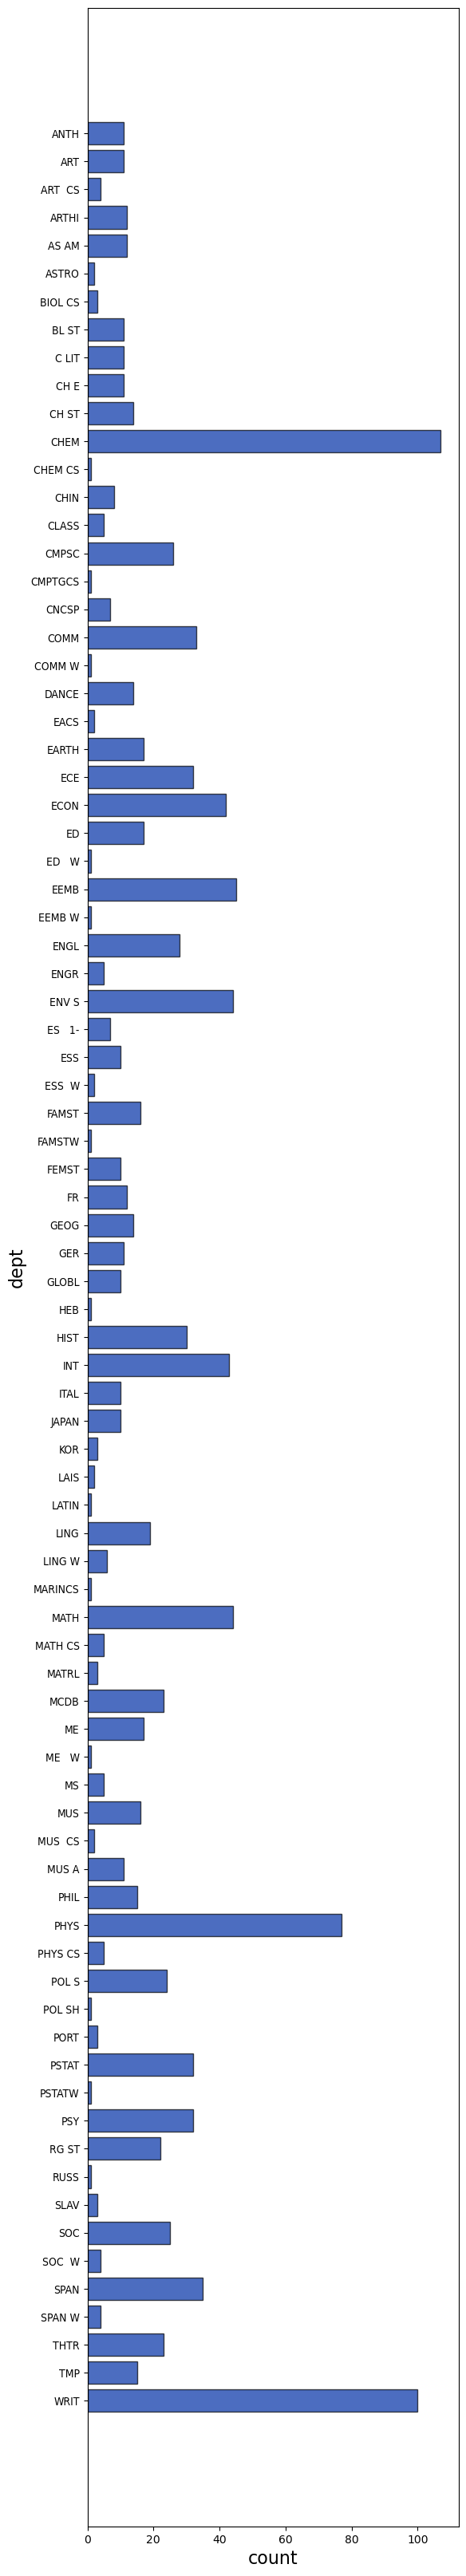

In [193]:
counts.barh("dept") # Bar graph of count, by department

Or we can make a bar graph by enrollment:

In [202]:
enrollment = coursesToCount.select("dept","ENROLLED").group("dept",sum).sort("ENROLLED sum",descending=True)
enrollment.show(10)

dept,ENROLLED sum
CHEM,5378
ECON,5115
PSY,3789
MATH,3758
PSTAT,3417
PHYS,3120
HIST,2841
COMM,2765
SOC,2698
EEMB,2524


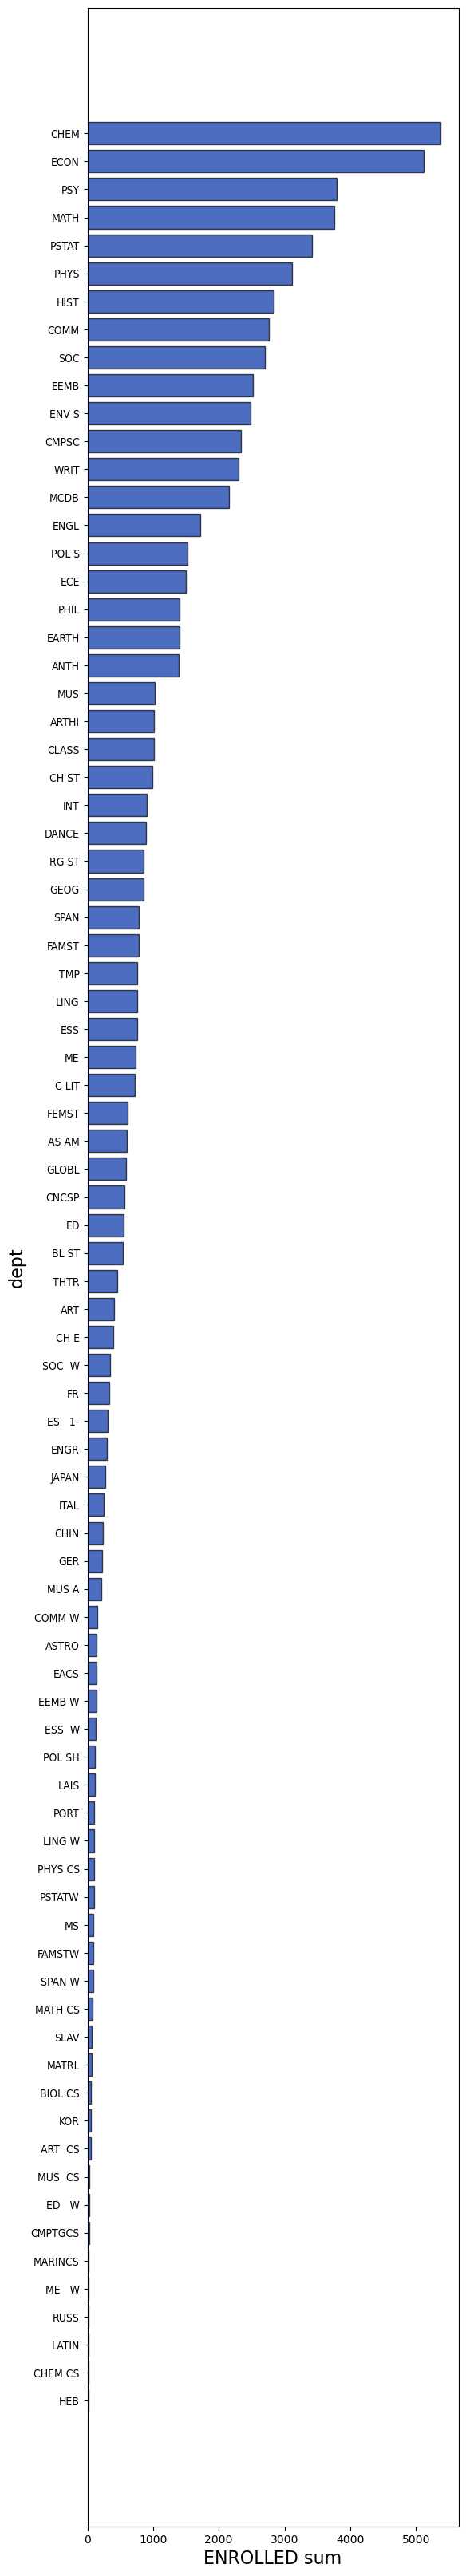

In [204]:
enrollment.barh("dept","ENROLLED sum")